
# **Servo Prediction using Linear Regression**

## **Get Understanding about Data set**

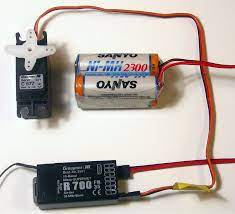

What is Servo: In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position-the operator does this by observation. By contrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the Al lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

1. Motor A,B,C,D,E

2. Screw A,B,C,D,E

3. Pgain 3,4,5,6

4. Vgain 1,2,3,4,5

5. Class 0.13 to 7.10

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [2]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")
data.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [3]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
data.shape

(167, 5)

## **Get Categories and Couts of Categorical Variables**

In [4]:
data[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [5]:
data[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

## **Get Encoding of Categorial Features**

In [6]:
data.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
data.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

## **Define Target Vaiable Y and Feature X**

In [7]:
y=data['Class']
x=data[['Motor', 'Screw', 'Pgain', 'Vgain']]
x.shape,y.shape

((167, 4), (167,))

In [8]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


## **Get Train Test Splt**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

## **Get Train Model**

In [10]:
from sklearn.linear_model import LinearRegression
Ir=LinearRegression()
Ir.fit(x_train, y_train)

LinearRegression()

## **Get Model Prediction**

In [11]:
y_pred=Ir.predict(x_test)
y_pred.shape

(51,)

## **Get Model Evaluation**

In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)
r2_score (y_test, y_pred)

0.6807245170563927

## **Get Visualization of Actual Vs Predicted Results**

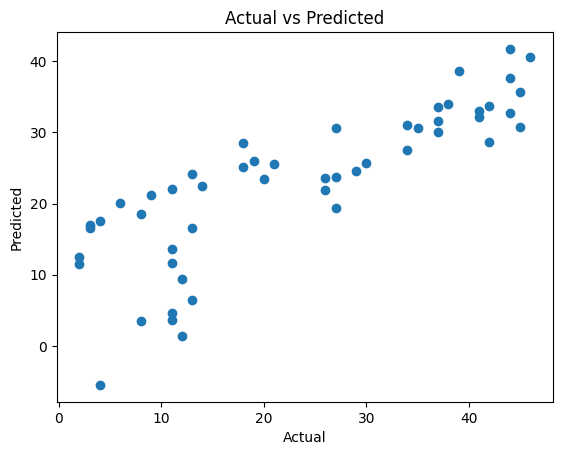

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## **Get Future Predictions**

**Lets select a random sample from existing dataset as new value**

Steps to follow

1. Extract a random row using sample function

2. Separate X and y

3. Standardize X

4. Predict

In [14]:
x_new=data.sample()
x_new =x_new.drop('Class',axis=1)
y_pred_new=Ir.predict(x_new)
y_pred_new

array([17.49294672])